In [72]:
# Sqlite is a library that implements a SQL database engine. 
import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
conn = sqlite3.connect('/Users/tanishalohchab/Documents/SQL Database/database.sqlite')
cursor = conn.cursor()

In [74]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the Database


['Country', 'CountryNotes', 'Series', 'Indicators', 'SeriesNotes', 'Footnotes']

In [75]:
for table in table_list:
    print("\ntable:" + table)
    columns_info = conn.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


table:Country
('CountryCode', 'TEXT')
('ShortName', 'TEXT')
('TableName', 'TEXT')
('LongName', 'TEXT')
('Alpha2Code', 'TEXT')
('CurrencyUnit', 'TEXT')
('SpecialNotes', 'TEXT')
('Region', 'TEXT')
('IncomeGroup', 'TEXT')
('Wb2Code', 'TEXT')
('NationalAccountsBaseYear', 'TEXT')
('NationalAccountsReferenceYear', 'TEXT')
('SnaPriceValuation', 'TEXT')
('LendingCategory', 'TEXT')
('OtherGroups', 'TEXT')
('SystemOfNationalAccounts', 'TEXT')
('AlternativeConversionFactor', 'TEXT')
('PppSurveyYear', 'TEXT')
('BalanceOfPaymentsManualInUse', 'TEXT')
('ExternalDebtReportingStatus', 'TEXT')
('SystemOfTrade', 'TEXT')
('GovernmentAccountingConcept', 'TEXT')
('ImfDataDisseminationStandard', 'TEXT')
('LatestPopulationCensus', 'TEXT')
('LatestHouseholdSurvey', 'TEXT')
('SourceOfMostRecentIncomeAndExpenditureData', 'TEXT')
('VitalRegistrationComplete', 'TEXT')
('LatestAgriculturalCensus', 'TEXT')
('LatestIndustrialData', 'NUMERIC')
('LatestTradeData', 'NUMERIC')
('LatestWaterWithdrawalData', 'NUMERIC')



In [76]:
#sqlite_master is a table with database schema
pd.read_sql(""" SELECT *
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


1. SELECTING

In [77]:
# check the head
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [78]:
#checking for missing values in every column of every table
for table in table_list:
    print(f'\nMissing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", conn)
    print(df_table.isnull().sum())


Missing Values in table Country
CountryCode                                   0
ShortName                                     0
TableName                                     0
LongName                                      0
Alpha2Code                                    0
CurrencyUnit                                  0
SpecialNotes                                  0
Region                                        0
IncomeGroup                                   0
Wb2Code                                       0
NationalAccountsBaseYear                      0
NationalAccountsReferenceYear                 0
SnaPriceValuation                             0
LendingCategory                               0
OtherGroups                                   0
SystemOfNationalAccounts                      0
AlternativeConversionFactor                   0
PppSurveyYear                                 0
BalanceOfPaymentsManualInUse                  0
ExternalDebtReportingStatus                   0
SystemO

In [79]:
# lets check the distinct indicators 
pd.read_sql("""SELECT DISTINCT IndicatorName
                FROM Indicators;""",
           conn)

,IndicatorName
0,"2005 PPP conversion factor, GDP (LCU per inter..."
1,"2005 PPP conversion factor, private consumptio..."
2,ARI treatment (% of children under 5 taken to ...
3,Access to electricity (% of population)
4,"Access to electricity, rural (% of rural popul..."
...,...
1339,Women's share of population ages 15+ living wi...
1340,"Youth literacy rate, population 15-24 years, b..."
1341,"Youth literacy rate, population 15-24 years, f..."
1342,"Youth literacy rate, population 15-24 years, g..."


2. FILTERING

In [80]:
#Select the indicators relating to GDP 
pd.read_sql("""SELECT DISTINCT IndicatorName
               FROM Indicators
               WHERE IndicatorName LIKE 'GDP%';""",
           conn)

,IndicatorName
0,GDP (constant LCU)
1,GDP (current LCU)
2,GDP at market prices (constant 2005 US$)
3,GDP at market prices (current US$)
4,GDP deflator (base year varies by country)
5,GDP growth (annual %)
6,GDP per capita (constant 2005 US$)
7,GDP per capita (constant LCU)
8,GDP per capita (current LCU)
9,GDP per capita (current US$)


3. AGGREGATING AND SUMMARIZING

In [82]:
# let's search for the highest GDP per capita through the years 
pd.read_sql("""SELECT CountryName, MAX (Value), Year
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
              """,
            conn)

,CountryName,MAX (Value),Year
0,Monaco,193648.132213,2008


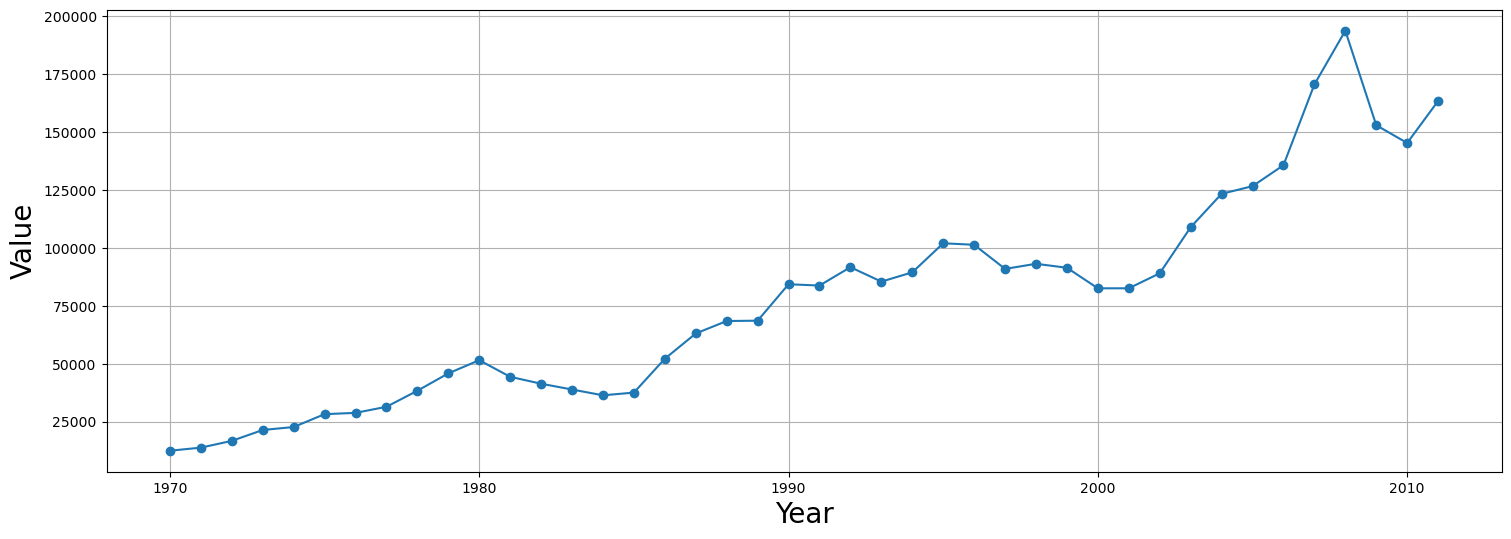

In [83]:
#Tracking the GDP for the highest GDP per capita through the years
Monaco1 = pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP per capita (current US$)'
                AND CountryName = "Monaco"
                """,
           conn)
y = Monaco1.groupby('Year')[['Value']].sum()
plt.figure(figsize = (18,6))
plt.plot(y.index, y ['Value'], marker = 'o')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Value', fontsize = 20)
plt.grid('b')
plt.show()

In [84]:
# let's search for the lowest GDP per capita through the years 
pd.read_sql("""SELECT CountryName, MIN (Value), Year
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
              """,
            conn)

,CountryName,MIN (Value),Year
0,Equatorial Guinea,35.367727,1962


<Axes: xlabel='Year', ylabel='Value'>

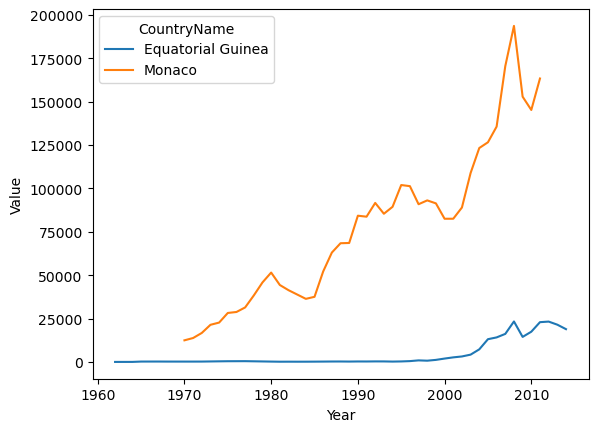

In [85]:
# let's  compare the countries with the highest and lowest 
df = pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND (CountryName= 'Equatorial Guinea' OR CountryName= 'Monaco')
               """,
           conn)

sns.lineplot(data = df, x = "Year", y = 'Value', hue = 'CountryName')

In [94]:
#Let's order (and reafirm the highest GDP per capita) in 2003
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND Year = 2003
               ORDER BY Value DESC
               LIMIT 10""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,108889.217254
1,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,89553.906068
2,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,66111.725227
3,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,64669.939720
4,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,50111.654449
5,Channel Islands,CHI,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,48227.665509
6,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,47960.564972
7,Ireland,IRL,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,41170.067231
8,Denmark,DNK,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,40458.770640
9,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,2003,39677.198348


In [109]:
# Let's compare the averages values of the of GDP per capita of the countries top 10 countries
topavg = pd.read_sql(""" SELECT CountryName, AVG(Value)
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                GROUP BY CountryName
                ORDER BY AVG(Value) DESC
                LIMIT 10;""",
           conn)
topavg

,CountryName,AVG(Value)
0,Monaco,77367.086708
1,Liechtenstein,58386.073030
2,Channel Islands,50912.094992
3,Cayman Islands,47147.710137
4,San Marino,42151.387998
5,Faeroe Islands,38110.698230
6,Luxembourg,37836.168711
7,Switzerland,35770.324923
8,United Arab Emirates,33328.605338
9,Qatar,32297.668737


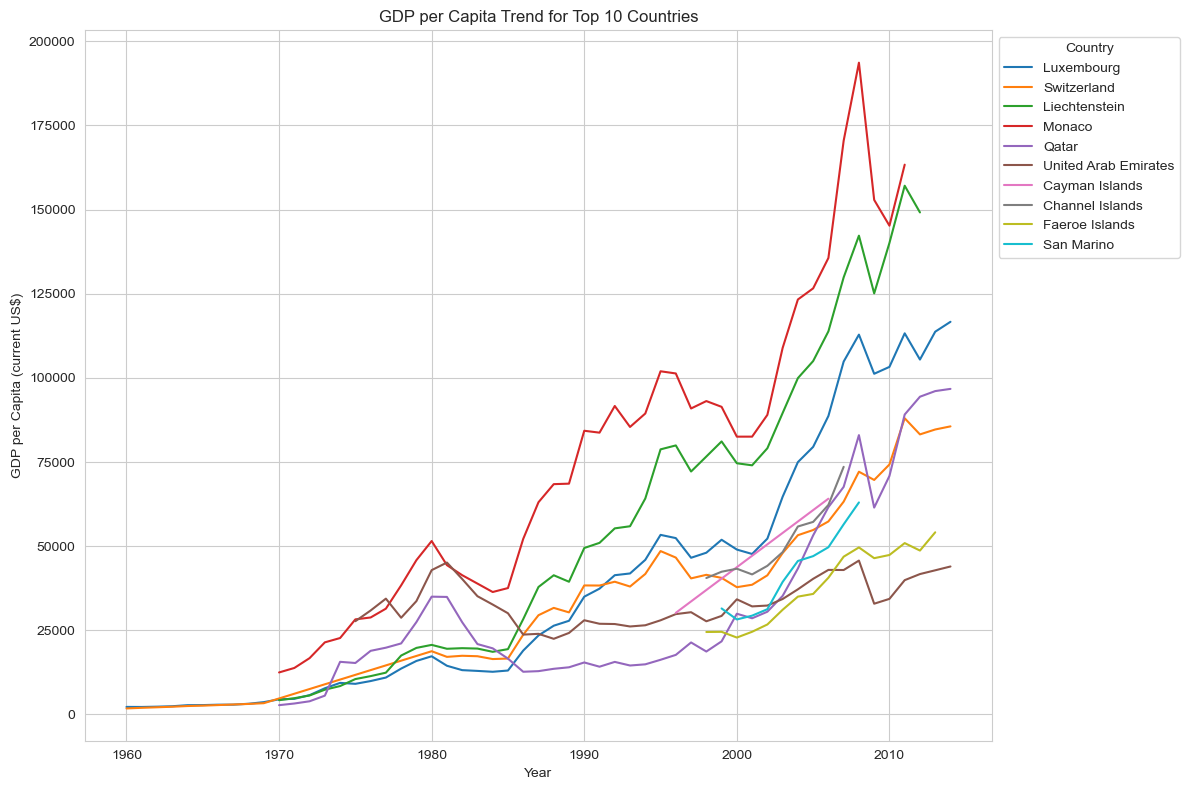

In [111]:
# printing the GDP of these countries 
average = pd.read_sql("""
    SELECT CountryName, Year, Value AS GDP
    FROM Indicators
    WHERE IndicatorName = 'GDP per capita (current US$)'
    AND CountryName IN (
        SELECT CountryName
        FROM Indicators
        WHERE IndicatorName = 'GDP per capita (current US$)'
        AND CountryName IN ('Monaco', 'Liechtenstein', 'Channel Islands', 'Cayman Islands', 'San Marino', 'Faeroe Islands', 'Luxembourg', 'Switzerland', 'United Arab Emirates', 'Qatar')
        GROUP BY CountryName
        ORDER BY AVG(Value) DESC
        LIMIT 10
    );
""", conn)

# Set up the plot using Seaborn
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.lineplot(data=average, x="Year", y="GDP", hue="CountryName")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("GDP per Capita (current US$)")
plt.title("GDP per Capita Trend for Top 10 Countries")

# Add legend
plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


4. JOINS

In [23]:
# let's make a join to get the information about indicators GDP related measured in 2014 in Brazil
pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName LIKE 'GDP%'
                AND CountryName ='Brazil'
                AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,Brazil,BRA,GDP (constant LCU),NY.GDP.MKTP.KN,2014,1.872042e+12,GDP is the sum of gross value added by all res...
1,Brazil,BRA,GDP (current LCU),NY.GDP.MKTP.CN,2014,5.521256e+12,GDP at purchaser's prices is the sum of gross ...
2,Brazil,BRA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,2014,1.206071e+12,None
3,Brazil,BRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2014,2.346076e+12,None
4,Brazil,BRA,GDP deflator (base year varies by country),NY.GDP.DEFL.ZS,2014,2.949323e+02,The GDP implicit deflator is the ratio of GDP ...
5,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,1.447074e-01,Annual percentage growth rate of GDP at market...
6,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,5.852500e+03,GDP per capita is gross domestic product divid...
7,Brazil,BRA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,2014,9.084146e+03,GDP per capita is gross domestic product divid...
8,Brazil,BRA,GDP per capita (current LCU),NY.GDP.PCAP.CN,2014,2.679208e+04,GDP per capita is gross domestic product divid...
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1.138442e+04,GDP per capita is gross domestic product divid...


5. USING CASE: WHEN 


In [112]:
df=pd.read_sql(""" SELECT *,
                   CASE WHEN Value < 10000 THEN 'Low'
                   WHEN Value > 80000 THEN 'High'
                   ELSE 'Medium' END AS Category
                   FROM Indicators
                   WHERE IndicatorName='GDP per capita (current US$)'
                   AND Year=2014;""",
              conn)

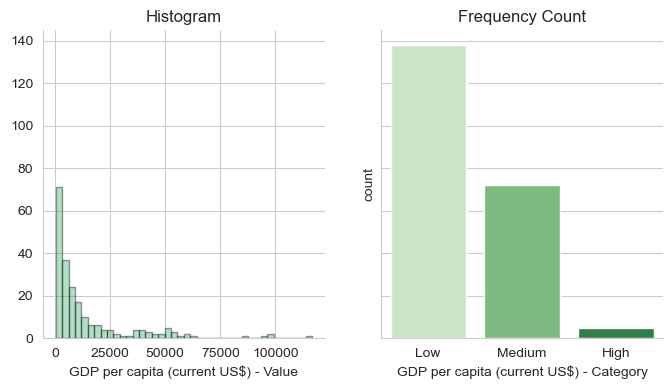

In [113]:
fig, axes= plt.subplots(1,2, figsize=(8,4),sharey=True)

ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
ax1.set_title('Histogram')
ax1.set(xlabel="GDP per capita (current US$) - Value")
ax1= sns.despine()

ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])
ax2.set_title('Frequency Count')
ax2.set(xlabel="GDP per capita (current US$) - Category")
ax2= sns.despine();

In [114]:
fig.savefig('eda_sql.png', transparent=True)

6. WINDOW FUNCTION


In [115]:
# adding the mean of last 3 years using window function

pd.read_sql(""" SELECT *,
                ROUND(AVG(Value) OVER (PARTITION BY CountryCode),0) AS AVG_3Y
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
                AND Year IN (2012,2013,2014);""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,AVG_3Y
0,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,39666.369215,41236.0
1,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,42806.522553,41236.0
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,690.842629,664.0
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,666.795051,664.0
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,633.569247,664.0
...,...,...,...,...,...,...,...
659,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,1759.192902,1722.0
660,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1721.623274,1722.0
661,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,850.827694,896.0
662,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,905.500322,896.0


7. COMMAN EXPRESSION TABLE (CTE)


In [120]:
#checking the first place for every year 
pd.read_sql(""" WITH GDP_3 AS 
                (SELECT *,
                RANK () OVER (PARTITION BY Year ORDER BY Value DESC) AS myrank
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
            AND Year >= 1980)
                
                SELECT *
                FROM GDP_3
                WHERE myrank = 1;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,myrank
0,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1980,51526.620641,1
1,United Arab Emirates,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,1981,45131.335681,1
2,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1982,41377.866437,1
3,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1983,38883.613816,1
4,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1984,36379.145551,1
5,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1985,37552.055643,1
6,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1986,52162.268942,1
7,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1987,63049.662150,1
8,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1988,68427.206618,1
9,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,1989,68574.245256,1
